In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [22]:
# Parameters settings
w = np.random.uniform(0, 1, size=(2, 5, 5))
# initial width 
sig0 = np.sqrt(5**2 + 5**2)/2
sigma = sig0
iteration = 50000
tau1 = iteration/np.log(sig0)
tau2 = iteration
lr0 = 0.1
lr = lr0

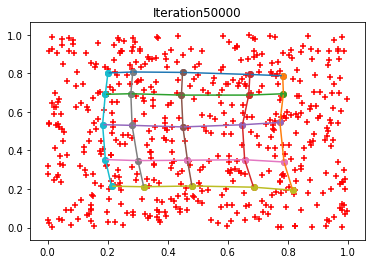

In [23]:
# Sqaure
trainX = np.random.uniform(0,1, size=(2, 500))
# SOM
for i in range(iteration):
    # sampling
    idx = np.random.randint(0, trainX.shape[1])
    # Competition
    dist = np.zeros((5,5))
    for r in range(5):
        for c in range(5):
            dist[r,c] = np.sqrt((trainX[0, idx] - w[0, r,c])**2 +(trainX[1, idx] - w[1, r,c])**2)
    min_r_idx, min_c_idx = np.where(dist == np.amin(dist))
    # Adaption
    for r in range(5):
        for c in range(5):
            dist = (r - min_r_idx)**2 + (c - min_c_idx)**2
            h = np.exp(-dist/(2*sigma**2))
            w[:, r, c]= w[:, r, c] + lr*h*(trainX[:, idx] - w[:, r, c])
    if i ==0:
        continue
    lr = lr0*np.exp(-i/tau2)
    sigma = sig0*np.exp(-i/tau1)

plt.scatter(trainX[0, :], trainX[1, :], color ='r', marker = '+')
for i in range(5):
    plt.scatter(w[0,i,:], w[1,i,:])
    plt.plot(w[0,i,:], w[1,i,:])
    plt.plot(w[0,:,i],w[1,:,i])
    plt.scatter(w[0,:,i],w[1,:,i])
plt.title("Iteration"+ str(iteration))
plt.savefig('3_figures/'+'3b_' + str(iteration)+'.png')
plt.show()